In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


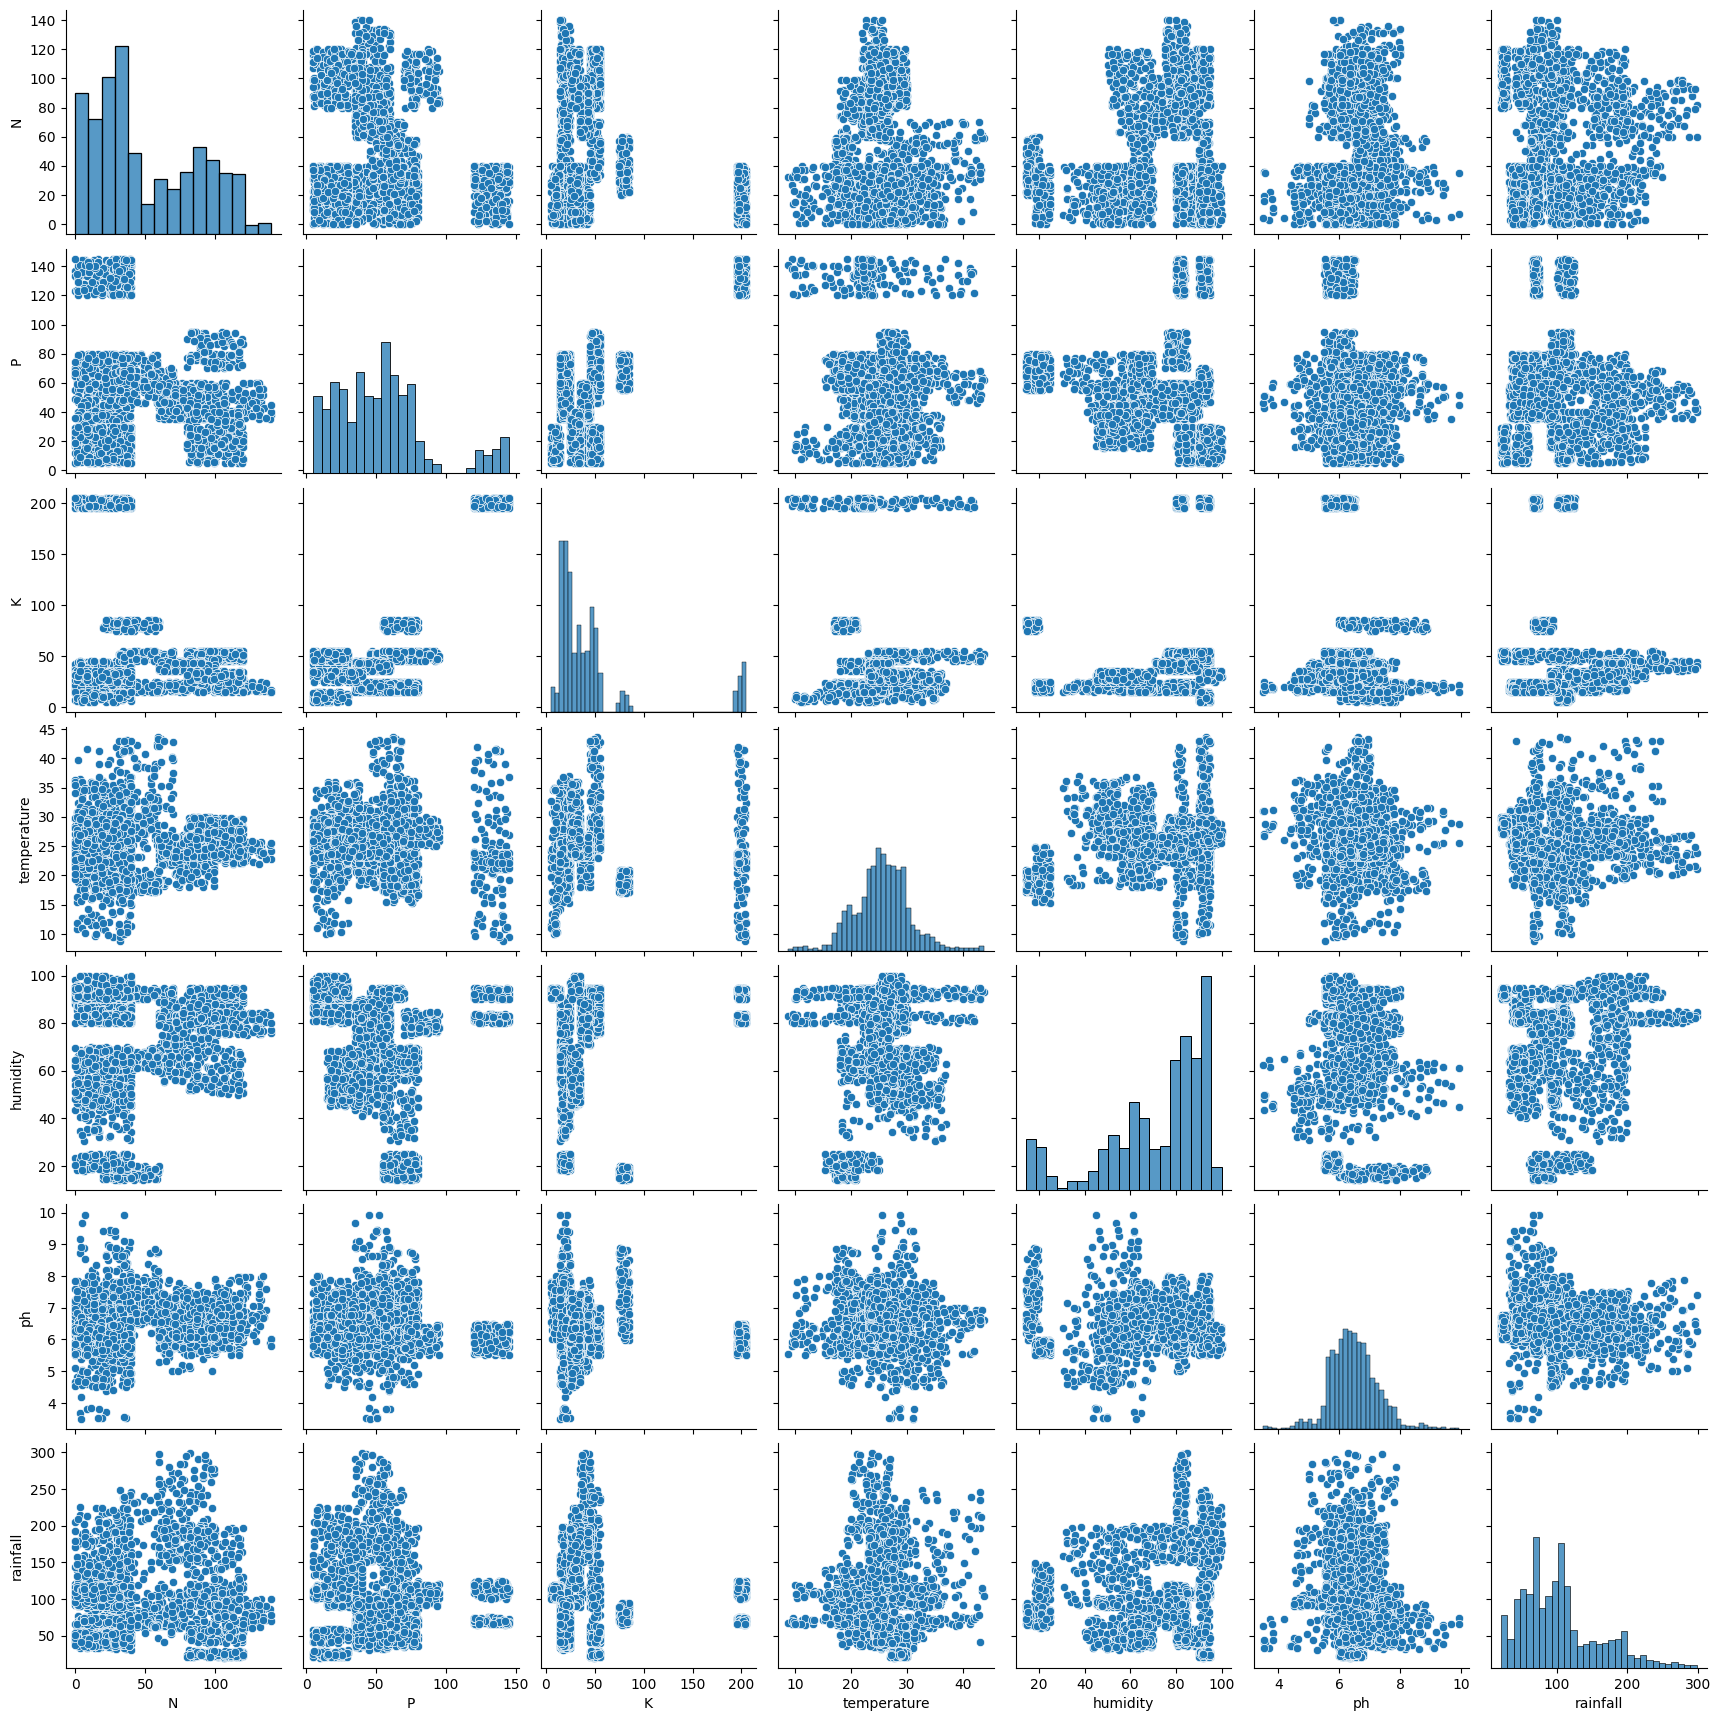

In [6]:
sns.pairplot(df)

In [10]:
pip install seaborn


In [12]:
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)


Non-numeric columns: Index(['label'], dtype='object')


<Axes: >

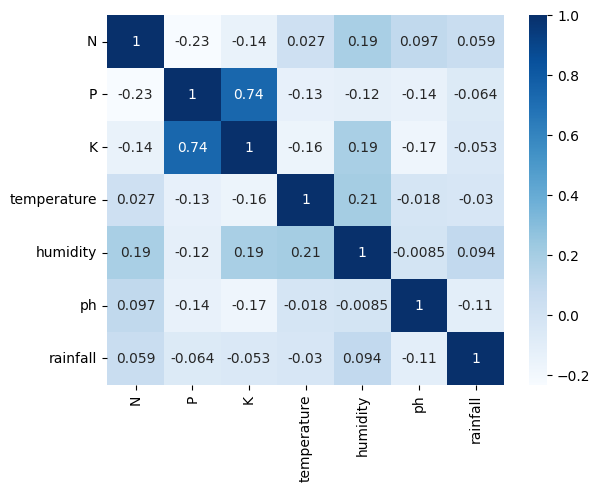

In [15]:
df_numeric = df.select_dtypes(include=[np.number])
sns.heatmap(df_numeric.corr(), cmap="Blues", annot=True)


In [16]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
#features = df[['temperature', 'humidity', 'ph', 'rainfall']]
labels = df['label']

In [17]:
acc = []
model = []

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [19]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

In [23]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

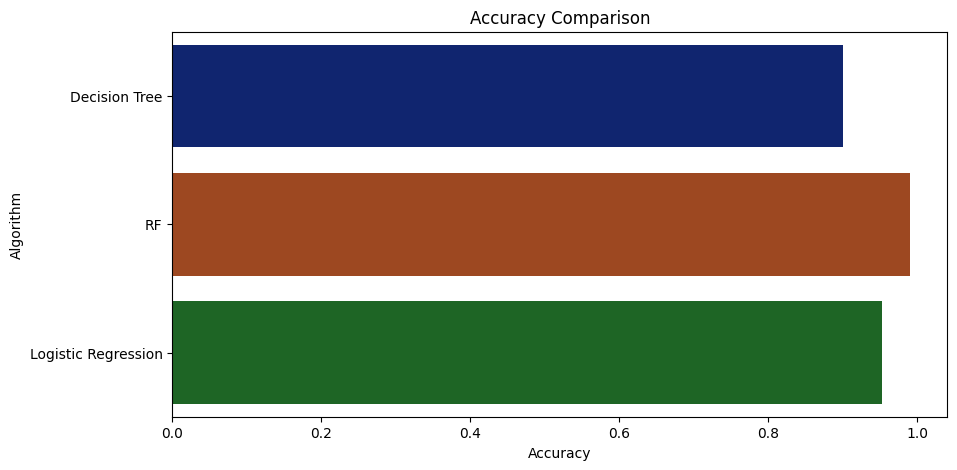

In [24]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [25]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
RF --> 0.990909090909091
Logistic Regression --> 0.9522727272727273


In [26]:
#making a prediction
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [5]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
crop_data = pd.read_csv('/content/crop_production (5).csv')

In [8]:
crop_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [9]:
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [10]:
crop_data.describe()

,Crop_Year,Area,Production
count,207434.000000,2.074340e+05,2.038750e+05
mean,2005.575373,1.165962e+04,6.741666e+05
std,4.912959,3.798310e+04,1.860017e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.500000e+01,9.400000e+01
50%,2005.000000,6.000000e+02,7.350000e+02
75%,2010.000000,4.400000e+03,6.983600e+03
max,2015.000000,1.020181e+06,1.250800e+09


In [11]:
print(crop_data['Crop'].unique())

['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard' 'Mesta' 'Cowpea(Lobia)' 'Lemon'
 'Pome Granet' 'Sapota' 'Cabbage' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Sannhamp' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total'
 'Pulses total' 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy'
 'Pineapple' 'Barley' 'Khesari' 'Guar seed' 'Moth'


In [12]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207434 entries, 0 to 207433
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     207434 non-null  object 
 1   District_Name  207434 non-null  object 
 2   Crop_Year      207434 non-null  int64  
 3   Season         207434 non-null  object 
 4   Crop           207434 non-null  object 
 5   Area           207434 non-null  float64
 6   Production     203875 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 11.1+ MB


In [13]:
crop_data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3559


In [14]:
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
207429,Uttar Pradesh,CHITRAKOOT,2005,Whole Year,Onion,111.0,1417.0
207430,Uttar Pradesh,CHITRAKOOT,2005,Whole Year,Sweet potato,21.0,275.0
207431,Uttar Pradesh,CHITRAKOOT,2006,Kharif,Arhar/Tur,16266.0,8799.0
207432,Uttar Pradesh,CHITRAKOOT,2006,Kharif,Bajra,9608.0,7700.0


In [15]:
crop_data.isnull().values.any()

False

In [16]:
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh'], dtype=object)

In [17]:
crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0,4.225000


In [18]:
crop_data["Production"].dtype


dtype('float64')

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


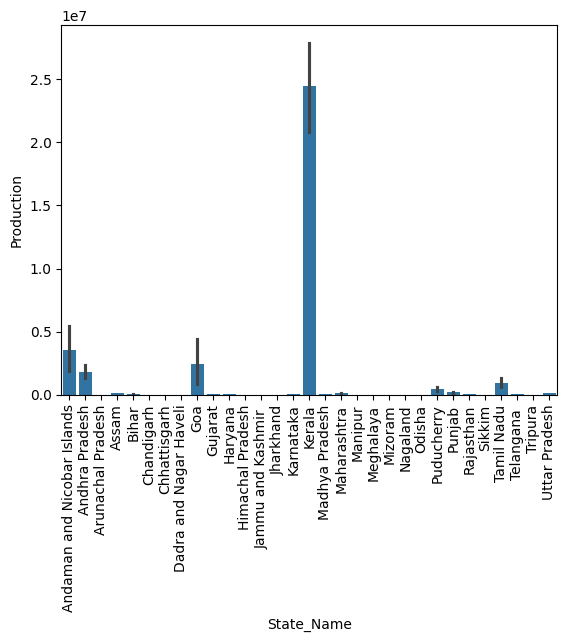

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correctly use keyword arguments x and y
sns.barplot(x="State_Name", y="Production", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


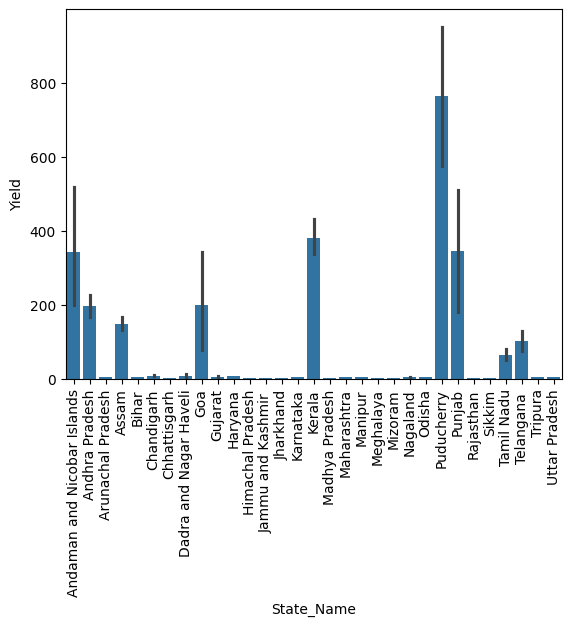

In [23]:
# Correct usage with keyword arguments
sns.barplot(x="State_Name", y="Yield", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


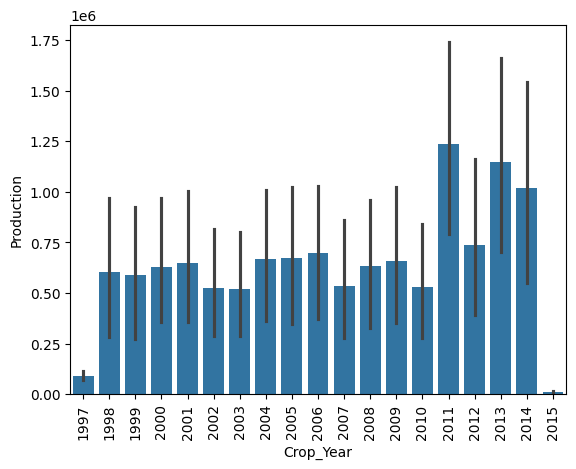

In [25]:
# Use keyword arguments for x, y, and data
sns.barplot(x="Crop_Year", y="Production", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


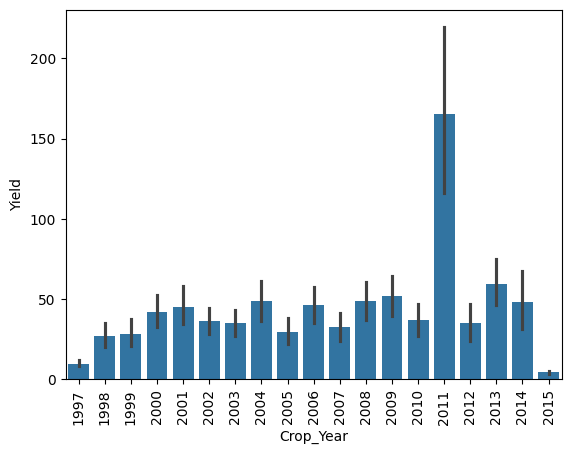

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use keyword arguments for x, y, and data
sns.barplot(x="Crop_Year", y="Yield", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


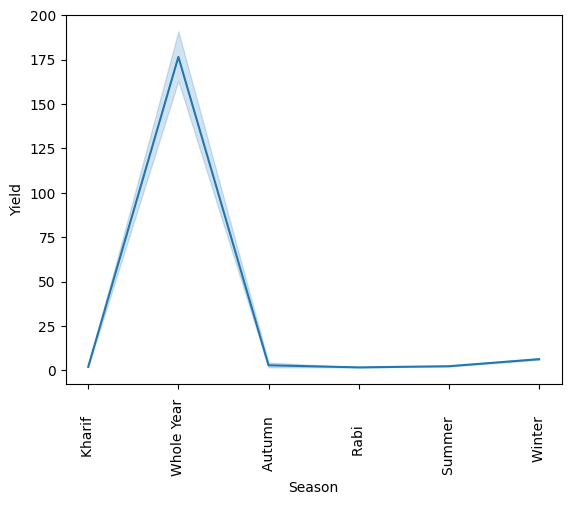

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use keyword arguments for x, y, and data
sns.lineplot(x="Season", y="Yield", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


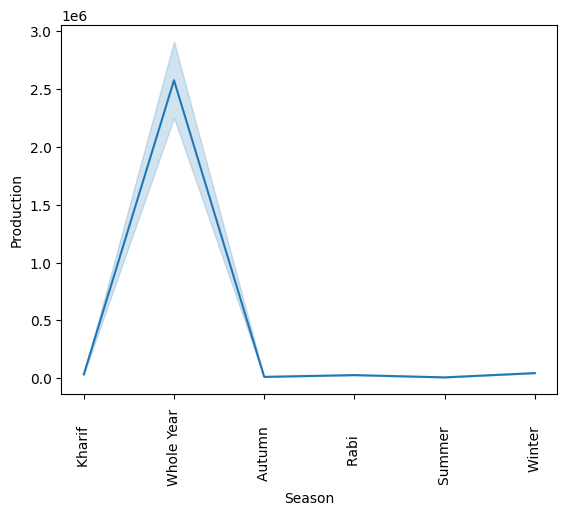

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use keyword arguments for x, y, and data
sns.lineplot(x="Season", y="Production", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


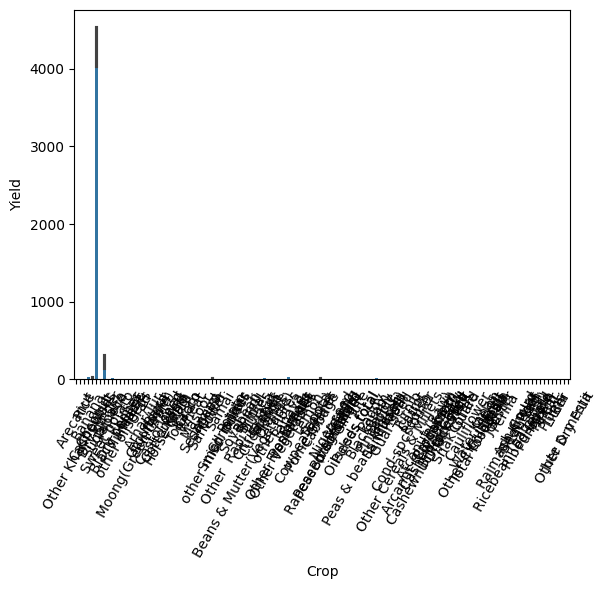

In [29]:

# Use keyword arguments for x, y, and data
sns.barplot(x="Crop", y="Yield", data=crop_data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=60)

# Display the plot
plt.show()


In [ ]:
sns.jointplot(x="Area",y="Production",data=crop_data,kind="reg")
plt.xticks(rotation=90)
plt.show()

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
crop_data = pd.read_csv('/content/crop_production (5).csv')

Conclusions Obtained from the dataset:

Kerela is the largest producer of crop in India.
Production per unit area (Yield ) of Puducherry is maximum.
In the year 2011, crop yield was maximum.
Analyzing each type of Crop

**1. RICE**

In [20]:
rice_data = crop_data[crop_data["Crop"]=="Rice"]
rice_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57
...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00


In [7]:
rice_data.shape

(15104, 7)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, '1997'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015')])

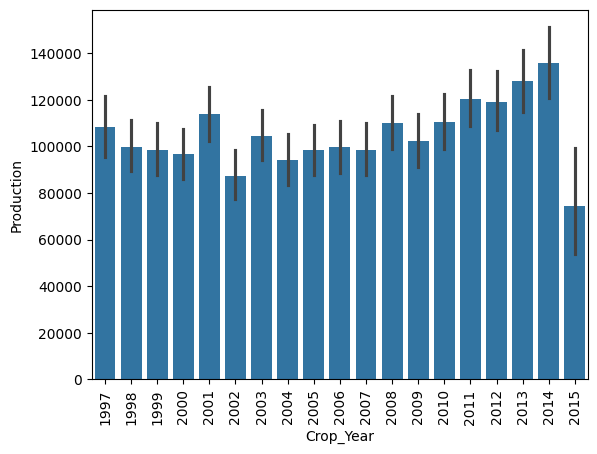

In [9]:
sns.barplot(x="Crop_Year",y="Production",data=rice_data)
plt.xticks(rotation=90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.,  600000.,  700000.,  800000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000'),
  Text(600000.0, 0, '600000'),
  Text(700000.0, 0, '700000'),
  Text(800000.0, 0, '800000')])

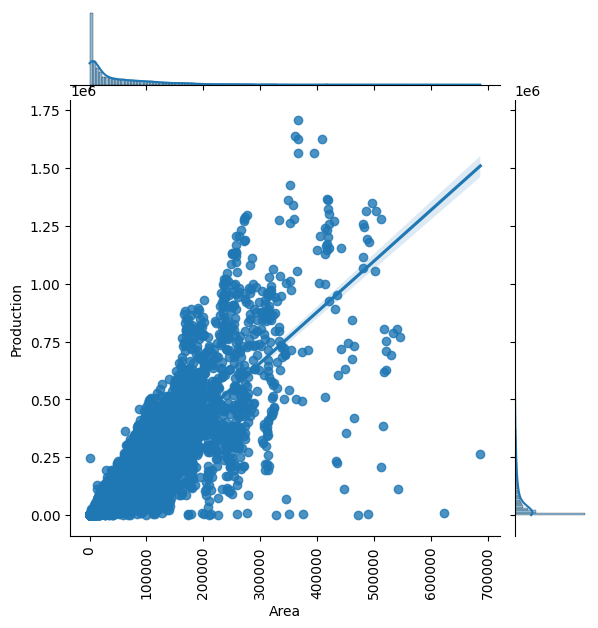

In [11]:
sns.jointplot(x="Area",y="Production",data=rice_data,kind="reg")
plt.xticks(rotation=90)

Observations :

Rice yield is maximum in Rabi season.
Rice yield is maximum in Chandigarh.
Rice yield has been growing a little from the year 2009 to 2014.
**WHEAT**

In [16]:
wheat_data = crop_data[crop_data["Crop"]=="Wheat"]
wheat_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0
...,...,...,...,...,...,...,...
245949,West Bengal,PURULIA,2010,Rabi,Wheat,2013.0,5152.0
245980,West Bengal,PURULIA,2011,Rabi,Wheat,1880.0,4206.0
246012,West Bengal,PURULIA,2012,Rabi,Wheat,1648.0,3310.0
246047,West Bengal,PURULIA,2013,Rabi,Wheat,1187.0,2675.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Jharkhand'),
  Text(12, 0, 'Karnataka'),
  Text(13, 0, 'Kerala'),
  Text(14, 0, 'Madhya Pradesh'),
  Text(15, 0, 'Maharashtra'),
  Text(16, 0, 'Meghalaya'),
  Text(17, 0, 'Mizoram'),
  Text(18, 0, 'Nagaland'),
  Text(19, 0, 'Odisha'),
  Text(20, 0, 'Punjab'),
  Text(21, 0, 'Rajasthan'),
  Text(22, 0, 'Sikkim'),
  Text(23, 0, 'Tamil Nadu'),
  Text(24, 0, 'Telangana '),
  Text(25, 0, 'Tripura'),
  Text(26, 0, 'Uttar Pradesh'),
  Text(27, 0, 'Uttarakhand'),
  Text(28, 0, 'West Bengal')]

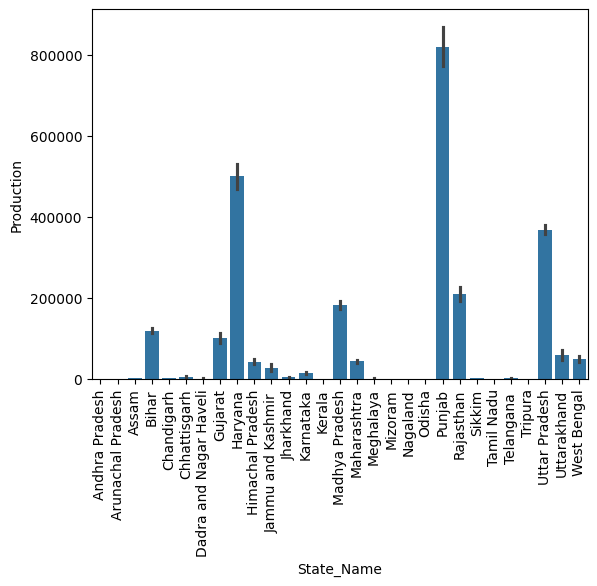

In [14]:
sns.barplot(x="State_Name",y="Production",data = wheat_data)
plt.xticks(rotation = 90)

(array([-100000.,       0.,  100000.,  200000.,  300000.,  400000.,
         500000.]),
 [Text(-100000.0, 0, '−100000'),
  Text(0.0, 0, '0'),
  Text(100000.0, 0, '100000'),
  Text(200000.0, 0, '200000'),
  Text(300000.0, 0, '300000'),
  Text(400000.0, 0, '400000'),
  Text(500000.0, 0, '500000')])

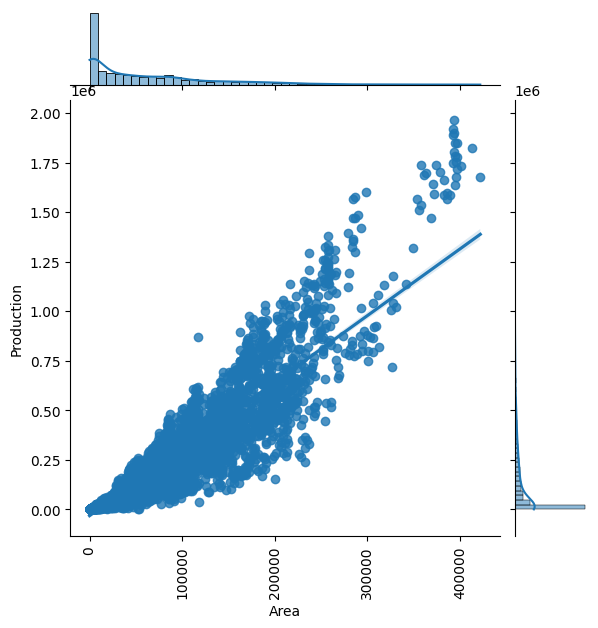

In [15]:
sns.jointplot(x="Area",y="Production",data=wheat_data,kind="reg")
plt.xticks(rotation=90)

Conclusions obtained :

Rice yield is maximum in Rabi season.
Rice yield is maximum in Chandigarh.
Rice yield has been growing a little from the year 2009 to 2014.     
   **3. COCONUT**

In [36]:
coconut_data = crop_data[crop_data["Crop"]=="Urad"]
coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
75,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Urad,1.5,1.16,0.773333
125,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Urad,1059.5,458.79,0.433025
199,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Urad,34.0,15.05,0.442647
270,Andhra Pradesh,ANANTAPUR,1999,Kharif,Urad,4.0,2.00,0.500000
309,Andhra Pradesh,ANANTAPUR,2000,Kharif,Urad,135.0,8.00,0.059259
...,...,...,...,...,...,...,...,...
207293,Uttar Pradesh,CHITRAKOOT,1999,Kharif,Urad,1053.0,343.00,0.325736
207315,Uttar Pradesh,CHITRAKOOT,2000,Kharif,Urad,1260.0,326.00,0.258730
207336,Uttar Pradesh,CHITRAKOOT,2001,Kharif,Urad,1263.0,411.00,0.325416
207354,Uttar Pradesh,CHITRAKOOT,2002,Kharif,Urad,667.0,214.00,0.320840


<Axes: xlabel='Season', ylabel='Yield'>

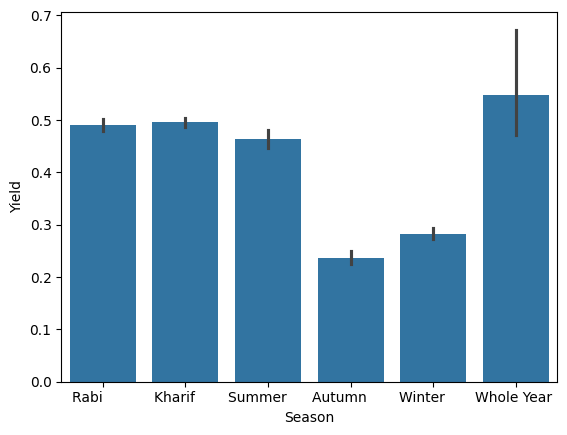

In [61]:
sns.barplot(x="Season",y="Yield",data = coconut_data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh')])

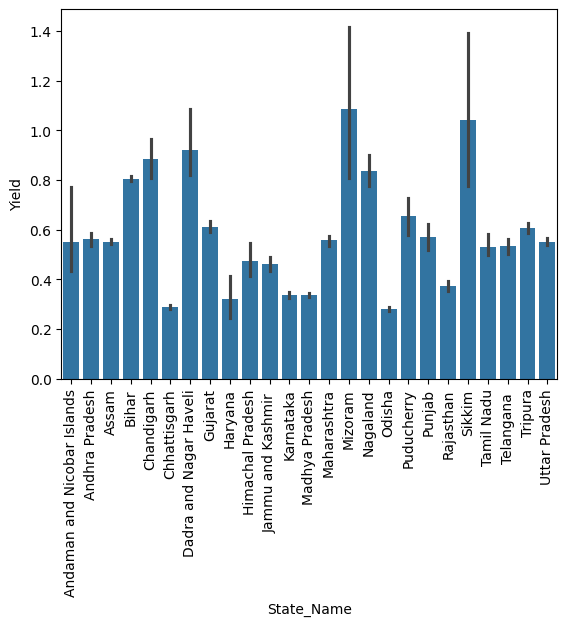

In [62]:
sns.barplot(x="State_Name",y="Yield",data = coconut_data)
plt.xticks(rotation = 90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Dadra and Nagar Haveli'),
  Text(7, 0, 'Gujarat'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Himachal Pradesh'),
  Text(10, 0, 'Jammu and Kashmir '),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Madhya Pradesh'),
  Text(13, 0, 'Maharashtra'),
  Text(14, 0, 'Mizoram'),
  Text(15, 0, 'Nagaland'),
  Text(16, 0, 'Odisha'),
  Text(17, 0, 'Puducherry'),
  Text(18, 0, 'Punjab'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh')])

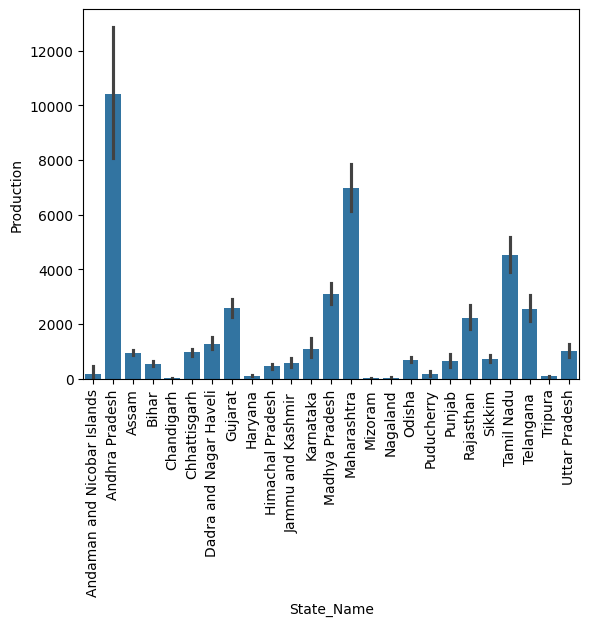

In [63]:
sns.barplot(x="State_Name",y="Production",data = coconut_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

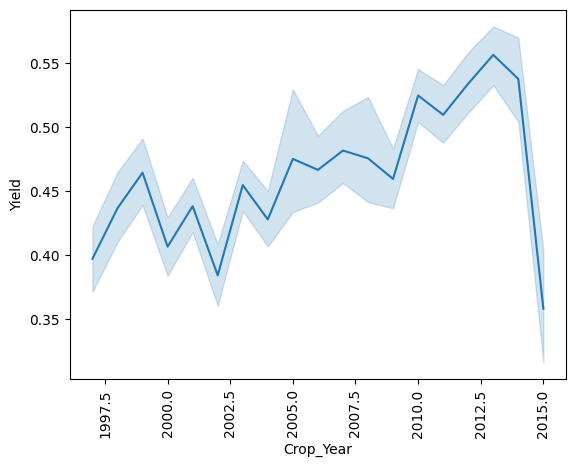

In [64]:
sns.lineplot(x="Crop_Year",y="Yield",data=coconut_data)
plt.xticks(rotation=90)

(array([-25000.,      0.,  25000.,  50000.,  75000., 100000., 125000.,
        150000., 175000., 200000.]),
 [Text(-25000.0, 0, '−25000'),
  Text(0.0, 0, '0'),
  Text(25000.0, 0, '25000'),
  Text(50000.0, 0, '50000'),
  Text(75000.0, 0, '75000'),
  Text(100000.0, 0, '100000'),
  Text(125000.0, 0, '125000'),
  Text(150000.0, 0, '150000'),
  Text(175000.0, 0, '175000'),
  Text(200000.0, 0, '200000')])

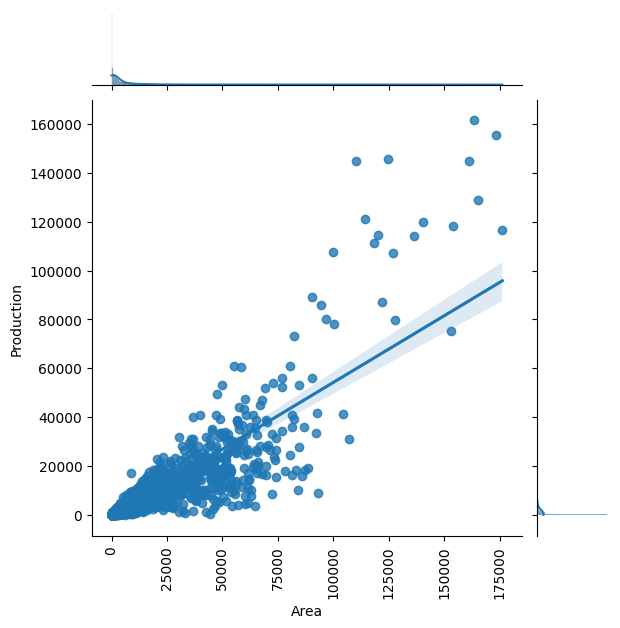

In [65]:
sns.jointplot(x="Area",y="Production",data=coconut_data,kind="reg")
plt.xticks(rotation=90)

Observations obtained :

Andhra Pradesh is the largest producing cocnut states.
Production per unit area is higher in Mizoram ans Sikkim.
Coconut yield is decreasing in the year 2012 to 2015.
  
  **4. POTATO**

In [42]:
potato_data = crop_data[crop_data["Crop"]=="Potato"]
potato_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
331,Andhra Pradesh,ANANTAPUR,2000,Whole Year,Potato,4.0,34.0,8.500000
433,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Potato,2.0,17.0,8.500000
530,Andhra Pradesh,ANANTAPUR,2004,Whole Year,Potato,2.0,20.0,10.000000
745,Andhra Pradesh,ANANTAPUR,2010,Whole Year,Potato,21.0,236.0,11.238095
792,Andhra Pradesh,ANANTAPUR,2011,Whole Year,Potato,18.0,181.0,10.055556
...,...,...,...,...,...,...,...,...
207344,Uttar Pradesh,CHITRAKOOT,2001,Whole Year,Potato,190.0,4686.0,24.663158
207365,Uttar Pradesh,CHITRAKOOT,2002,Whole Year,Potato,271.0,6287.0,23.199262
207387,Uttar Pradesh,CHITRAKOOT,2003,Whole Year,Potato,332.0,6944.0,20.915663
207403,Uttar Pradesh,CHITRAKOOT,2004,Rabi,Potato,302.0,6760.0,22.384106


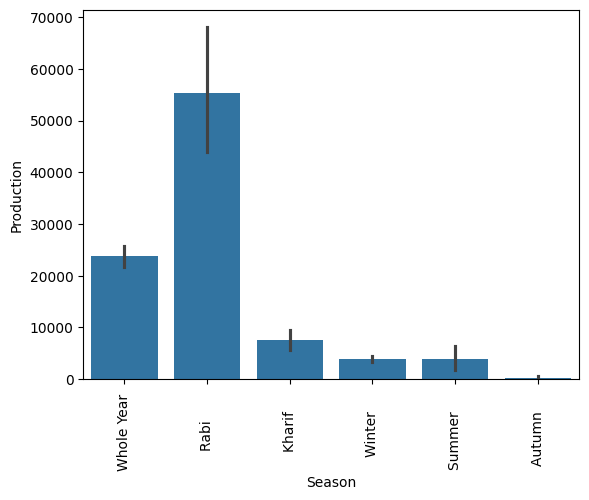

In [44]:
sns.barplot(x="Season", y="Production", data=potato_data)
plt.xticks(rotation=90)
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Arunachal Pradesh'),
  Text(2, 0, 'Assam'),
  Text(3, 0, 'Bihar'),
  Text(4, 0, 'Chandigarh'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'Gujarat'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Himachal Pradesh'),
  Text(9, 0, 'Jammu and Kashmir '),
  Text(10, 0, 'Jharkhand'),
  Text(11, 0, 'Karnataka'),
  Text(12, 0, 'Kerala'),
  Text(13, 0, 'Madhya Pradesh'),
  Text(14, 0, 'Manipur'),
  Text(15, 0, 'Meghalaya'),
  Text(16, 0, 'Mizoram'),
  Text(17, 0, 'Nagaland'),
  Text(18, 0, 'Odisha'),
  Text(19, 0, 'Rajasthan'),
  Text(20, 0, 'Sikkim'),
  Text(21, 0, 'Tamil Nadu'),
  Text(22, 0, 'Telangana '),
  Text(23, 0, 'Tripura'),
  Text(24, 0, 'Uttar Pradesh')])

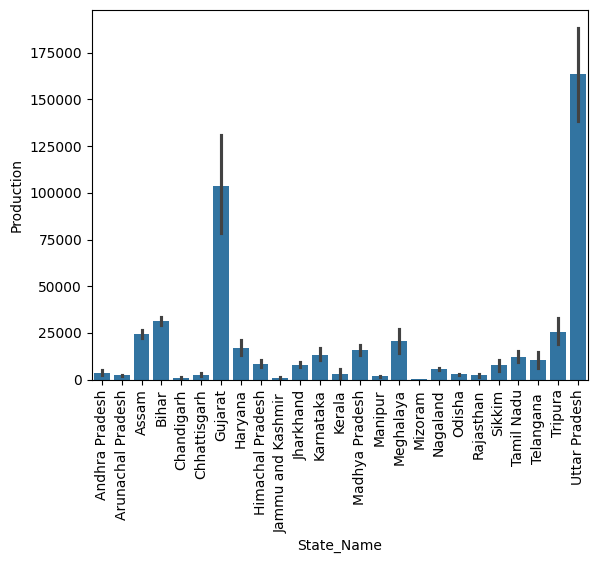

In [45]:
sns.barplot(x="State_Name",y="Production",data = potato_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

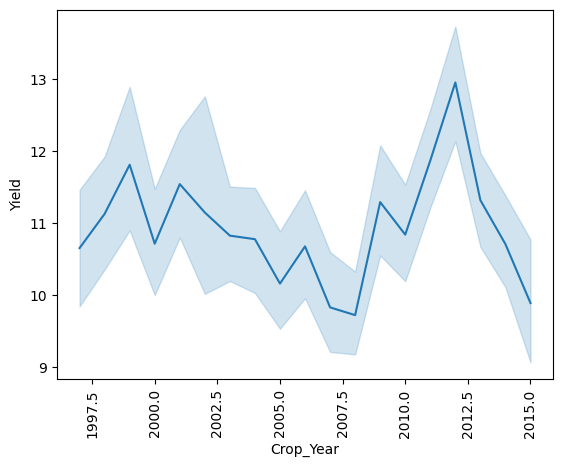

In [47]:
sns.lineplot(x="Crop_Year",y="Yield",data=potato_data)
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000'),
  Text(80000.0, 0, '80000')])

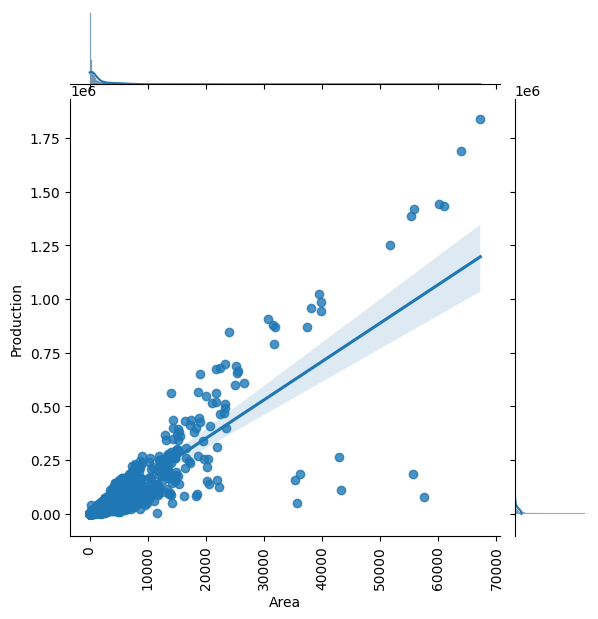

In [48]:
sns.jointplot(x="Area",y="Production",data=potato_data,kind="reg")
plt.xticks(rotation=90)

Conclusions obtained :

Potato is a Rabi crop.
West Bengal is the largest producer of potatoes.
5. ONION

In [49]:
onion_data = crop_data[crop_data["Crop"]=="Onion"]
onion_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
286,Andhra Pradesh,ANANTAPUR,1999,Whole Year,Onion,1770.0,32364.0,18.284746
300,Andhra Pradesh,ANANTAPUR,2000,Kharif,Onion,1103.0,15470.0,14.025385
320,Andhra Pradesh,ANANTAPUR,2000,Rabi,Onion,482.0,11514.0,23.887967
348,Andhra Pradesh,ANANTAPUR,2001,Kharif,Onion,1165.0,19232.0,16.508155
365,Andhra Pradesh,ANANTAPUR,2001,Rabi,Onion,380.0,8465.0,22.276316
...,...,...,...,...,...,...,...,...
207301,Uttar Pradesh,CHITRAKOOT,1999,Whole Year,Onion,154.0,2171.0,14.097403
207359,Uttar Pradesh,CHITRAKOOT,2002,Rabi,Onion,104.0,1073.0,10.317308
207382,Uttar Pradesh,CHITRAKOOT,2003,Rabi,Onion,101.0,1450.0,14.356436
207409,Uttar Pradesh,CHITRAKOOT,2004,Whole Year,Onion,102.0,1043.0,10.225490


<Axes: xlabel='Season', ylabel='Yield'>

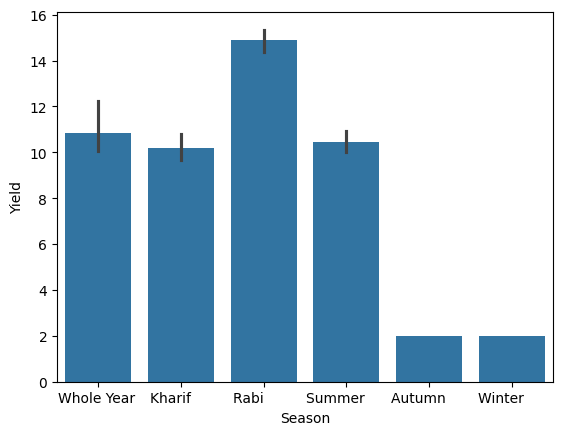

In [50]:
sns.barplot(x="Season",y="Yield",data = onion_data)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Andhra Pradesh'),
  Text(1, 0, 'Assam'),
  Text(2, 0, 'Bihar'),
  Text(3, 0, 'Chandigarh'),
  Text(4, 0, 'Chhattisgarh'),
  Text(5, 0, 'Gujarat'),
  Text(6, 0, 'Haryana'),
  Text(7, 0, 'Himachal Pradesh'),
  Text(8, 0, 'Jammu and Kashmir '),
  Text(9, 0, 'Jharkhand'),
  Text(10, 0, 'Karnataka'),
  Text(11, 0, 'Madhya Pradesh'),
  Text(12, 0, 'Maharashtra'),
  Text(13, 0, 'Manipur'),
  Text(14, 0, 'Odisha'),
  Text(15, 0, 'Puducherry'),
  Text(16, 0, 'Rajasthan'),
  Text(17, 0, 'Tamil Nadu'),
  Text(18, 0, 'Telangana '),
  Text(19, 0, 'Uttar Pradesh')])

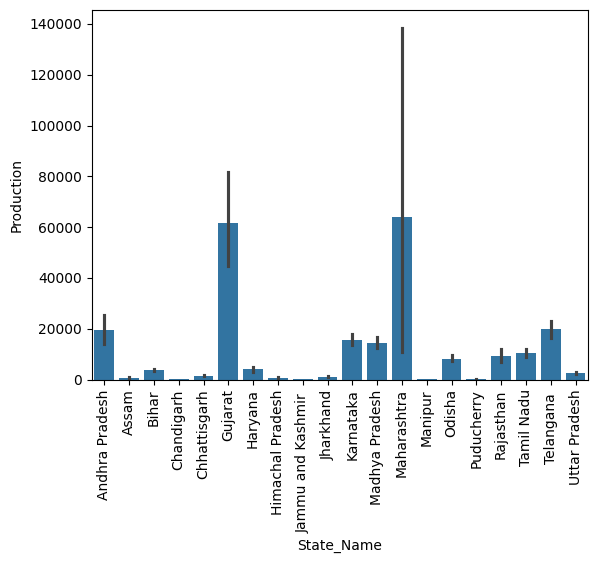

In [51]:
sns.barplot(x="State_Name",y="Production",data = onion_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. ]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0')])

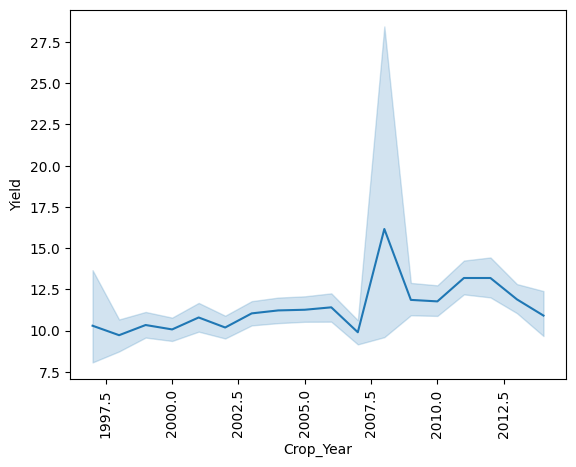

In [52]:
sns.lineplot(x="Crop_Year",y="Yield",data=onion_data)
plt.xticks(rotation=90)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(-10000.0, 0, '−10000'),
  Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000'),
  Text(70000.0, 0, '70000')])

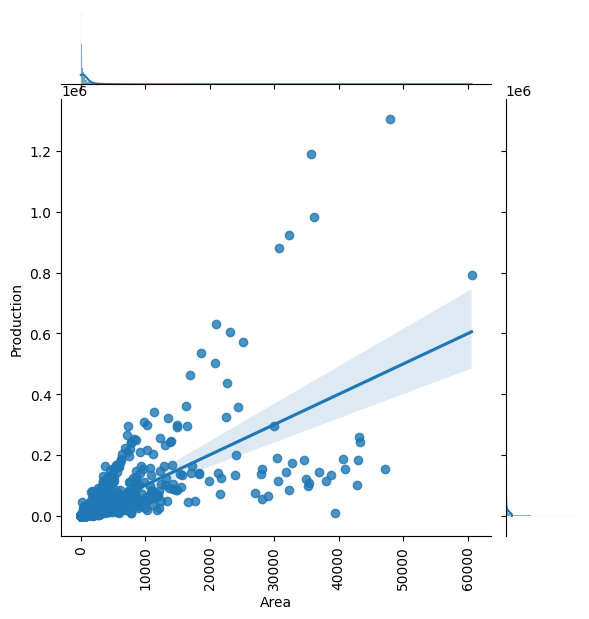

In [53]:
sns.jointplot(x="Area",y="Production",data=onion_data,kind="reg")
plt.xticks(rotation=90)

Observations :

Onion is a Rabi crop.
Gujrat and Maharastra are the major onion-producing states.
6. MAIZE

In [54]:
maize_data = crop_data[crop_data["Crop"]=="Maize"]
maize_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
71,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22,4.744792
120,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40,1.111880
194,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00,3.465753
212,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00,1.750000
226,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00,4.000000
...,...,...,...,...,...,...,...,...
207330,Uttar Pradesh,CHITRAKOOT,2001,Kharif,Maize,10.00,11.00,1.100000
207349,Uttar Pradesh,CHITRAKOOT,2002,Kharif,Maize,10.00,3.00,0.300000
207372,Uttar Pradesh,CHITRAKOOT,2003,Kharif,Maize,16.00,19.00,1.187500
207393,Uttar Pradesh,CHITRAKOOT,2004,Kharif,Maize,11.00,17.00,1.545455


<Axes: xlabel='Season', ylabel='Yield'>

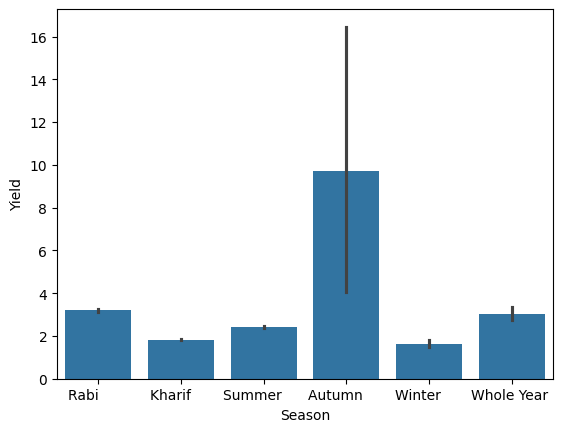

In [55]:
sns.barplot(x="Season",y="Yield",data = maize_data)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu and Kashmir '),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Madhya Pradesh'),
  Text(16, 0, 'Maharashtra'),
  Text(17, 0, 'Manipur'),
  Text(18, 0, 'Meghalaya'),
  Text(19, 0, 'Mizoram'),
  Text(20, 0, 'Nagaland'),
  Text(21, 0, 'Odisha'),
  Text(22, 0, 'Punjab'),
  Text(23, 0, 'Rajasthan'),
  Text(24, 0, 'Sikkim'),
  Text(25, 0, 'Tamil Nadu'),
  Text(26, 0, 'Telangana '),
  Text(27, 0, 'Tripura'),
  Text(28, 0, 'Utta

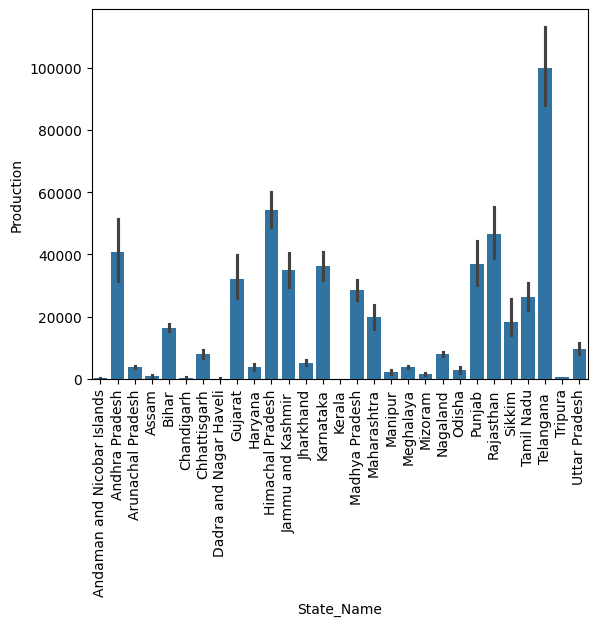

In [56]:
sns.barplot(x="State_Name",y="Production",data = maize_data)
plt.xticks(rotation = 90)

(array([1995. , 1997.5, 2000. , 2002.5, 2005. , 2007.5, 2010. , 2012.5,
        2015. , 2017.5]),
 [Text(1995.0, 0, '1995.0'),
  Text(1997.5, 0, '1997.5'),
  Text(2000.0, 0, '2000.0'),
  Text(2002.5, 0, '2002.5'),
  Text(2005.0, 0, '2005.0'),
  Text(2007.5, 0, '2007.5'),
  Text(2010.0, 0, '2010.0'),
  Text(2012.5, 0, '2012.5'),
  Text(2015.0, 0, '2015.0'),
  Text(2017.5, 0, '2017.5')])

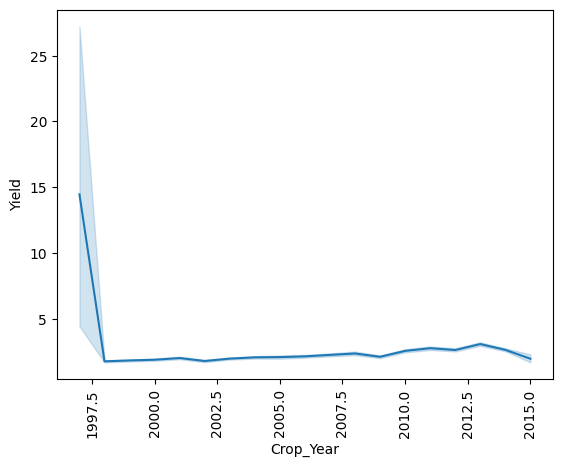

In [58]:
sns.lineplot(x="Crop_Year",y="Yield",data=maize_data)
plt.xticks(rotation=90)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.]),
 [Text(-50000.0, 0, '−50000'),
  Text(0.0, 0, '0'),
  Text(50000.0, 0, '50000'),
  Text(100000.0, 0, '100000'),
  Text(150000.0, 0, '150000'),
  Text(200000.0, 0, '200000'),
  Text(250000.0, 0, '250000')])

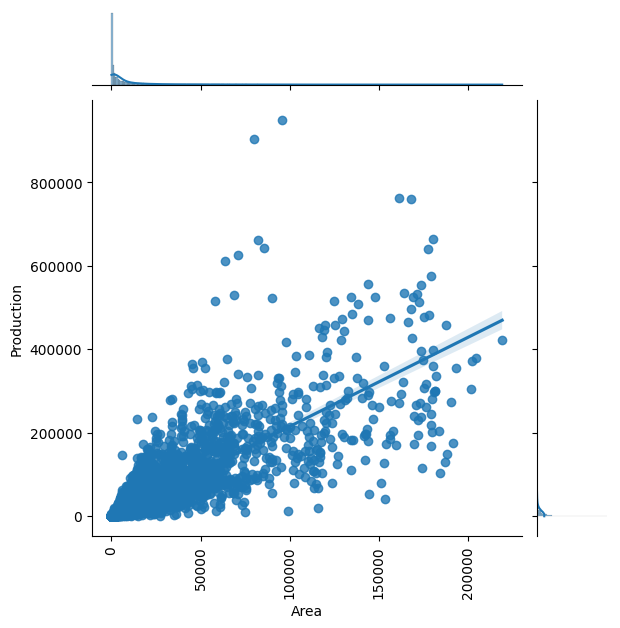

In [59]:
sns.jointplot(x="Area",y="Production",data=maize_data,kind="reg")
plt.xticks(rotation=90)

Observations Obtained -

Maize is produced in the autumn season
Telangana is the major maize-producing states.
There was a sudden decline in maize production from the year 2000.